In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


## Lagranto and other stuff demo collection
- Collection of codes, notebooks, etc. to do stuff with Lagranto
- Descriptions will be more forthcoming...

**In this notebook** we provide a short demonstration of how to fetch and plot some data using the *py-netcdf4* interface. The first example is taken principally from:
https://geos5.org/wiki/index.php?title=Recipe:_Python_program_as_OPeNDAP_client

Noting that they are still, quite irresponsibly, publishing Python 2.x codes, and also include a small error in the URL of their data (see comment/correction below).


In [4]:
import numpy, scipy
import matplotlib, pylab
import datetime as dtm, matplotlib.dates as mpd


In [18]:
#!/usr/bin/env python
 
import sys
import numpy as np
import netCDF4 as nc4
import matplotlib.pyplot as plt
# 
from mpl_toolkits.basemap import Basemap
#
# At one point they may have used port 9090 for this, but no longer...
#data_url = 'https://opendap.nccs.nasa.gov:9090/dods/OSSE/G5NR/Ganymed/7km/0.5000_deg/inst/inst01hr_3d_T_Cv'
data_url = 'https://opendap.nccs.nasa.gov/dods/OSSE/G5NR/Ganymed/7km/0.5000_deg/inst/inst01hr_3d_T_Cv'
#
rootgrp = nc4.Dataset(data_url, 'r')
print("rootgrp.variables['t'].shape", rootgrp.variables['t'].shape)
# 

rootgrp.variables['t'].shape (18288, 72, 361, 720)


Reading T (subset)... None
done.
T.shape: (72, 51, 131)
max(T): 305.6048
min(T): 191.6956


Text(0.5, 1.0, 'Air temperature at the surface')

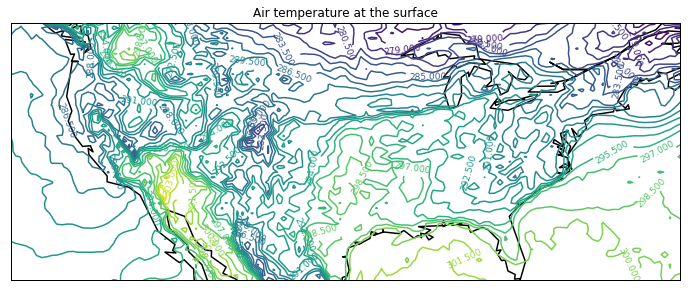

In [17]:
# read subset of air temperature
print('Reading T (subset)...', sys.stdout.flush())
T = rootgrp.variables['t'][11771,:,229:280,99:230]
print('done.')
sys.stdout.flush()
#
print('T.shape:', T.shape)
# 
# max/min
print('max(T): %.4f' % np.max(T))
print('min(T): %.4f' % np.min(T))
# 
# set up cylindrical map
#
fg = plt.figure(figsize=(12,10))
ax1 = plt.subplot('111')

m = Basemap(
    projection='cyl',
    llcrnrlat=25, urcrnrlat=50,
    llcrnrlon=-130, urcrnrlon=-65,
    resolution='c',
    ax=ax1
    )
m.drawcoastlines(linewidth=1.5)
m.drawmapboundary()
# 
# plot contour
level = 71 # surface
X = np.arange(-130.0, -64.99, .5) # -65 is the last element
Y = np.arange(25.0, 50.01, .5) # 50 is the last element
#

#
cp = ax1.contour(X, Y, T[level,:,:], 20, zorder=2)
ax1.clabel(cp, inline=1, fontsize=9)
ax1.set_title('Air temperature at the surface')
#plt.show()

In [13]:
nc4.Dataset('http://thredds.socib.es/thredds/dodsC/hf_radar/hf_radar_ibiza-scb_codarssproc001/L1/2016/dep0001_hf-radar-ibiza_scb-codarssproc001_L1_2016-02.nc')

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    title: Data from instrument SCB-CODARSSPROC001 on platform HF Radar Ibiza
    institution: SOCIB (Sistema de Observación y predicción Costero de las Islas Baleares)
    netcdf_version: 3.0
    Conventions: CF-1.6
    abstract: Real-time surface current data in the Ibiza Channel from the installed HF radar.
    summary: Real-time surface current data in the Ibiza Channel from the installed HF radar.
    date_created: 2016-02-01T01:21:13+00:00
    date_update: 2016-03-11T14:21:35+00:00
    date_modified: 2016-03-11T14:21:35+00:00
    cdm_data_type: Grid
    CF%3afeatureType: grid
    featureType: grid
    data_mode: R
    processing_level: L1 - Derived variables and quality control procedures applied
    instrument_serial: EB560F37-F444-4F2A-AEC9-1018898EA990
    id: 112_270_2016-03-11T14:21:35+00:00
    platform_code: 112
    instrument_code: 270
    keywords_vocabulary: http://gcmd.nasa.go